# Prediction Using Supervised Machine Learning

In [32]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading The Dataset For Further Analysis

In [33]:
#setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')

#loading the csv data into a data frame
ads_data=pd.read_csv('Social_Network_Ads.csv')
print("Data is imported successfully")

Data is imported successfully


## Exploratory Data Analysis

In [34]:
ads_data.head() # Head of the data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
# Checking data dimension
ads_data.shape

(400, 5)

In [36]:
#viewing the columns of the data
ads_data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [37]:
# Checking the column information
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [38]:
# Checking the structure of the data
ads_data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [39]:
# Checking for missing values if any
ads_data.isnull().sum().sort_values(ascending=False)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

There is no missing value in the dataset

In [40]:
ads_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [41]:
clear_data=ads_data.iloc[:,[1,2,3,4]]# I have excluded column 'User Id' since no analysis can be done on it since it has unique values

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<AxesSubplot:>

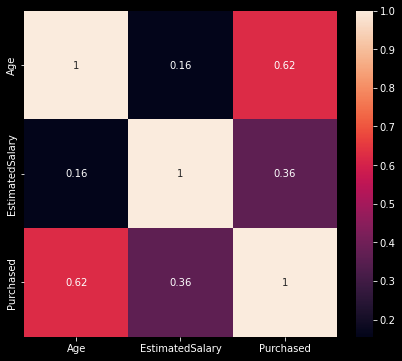

In [42]:
#showing correlation between the variables
ad_corr=clear_data.corr()
display(ad_corr)
#plotting the correlation matrix using heatmap
plt.style.use('dark_background')
plt.subplots(figsize=(7,6))
sns.heatmap(ad_corr,annot=True)

Text(0.5, 0, 'SALARY')

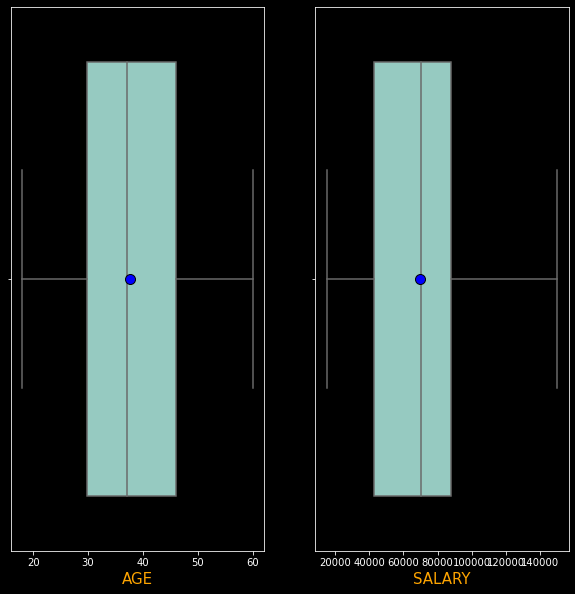

In [43]:
# Checking outliers by plotting boxplots for continuous variables
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.boxplot(ads_data['Age'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'blue','markeredgecolor':'black','markersize':10})
plt.xlabel('AGE',fontdict={'color':'orange','fontsize':15})

plt.subplot(1,2,2)
sns.boxplot(ads_data['EstimatedSalary'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'blue','markeredgecolor':'black','markersize':10})
plt.xlabel('SALARY',fontdict={'color':'orange','fontsize':15})



No outliers are  present in the dataset

## Data Visualization

### Univariate Analysis

Text(0.5, 0, 'Gender')

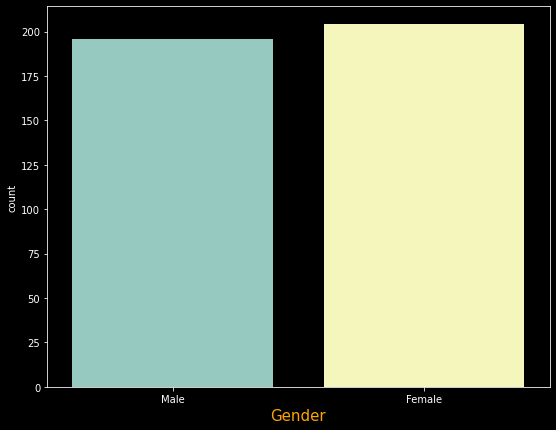

In [44]:
plt.style.use('dark_background')
plt.subplots(figsize=(9,7))
sns.countplot(ads_data['Gender'])
plt.xlabel('Gender',fontdict={'color':'orange','fontsize':15})


There are more females than males in the dataset

### Bivariate Analysis

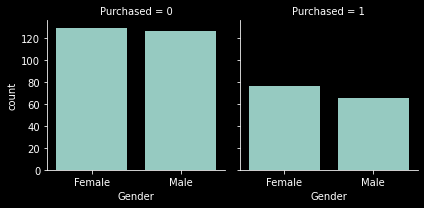

In [45]:
g=sns.FacetGrid(clear_data,col='Purchased')
g.map(sns.countplot,'Gender')

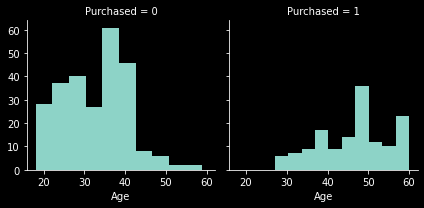

In [46]:
g=sns.FacetGrid(clear_data,col='Purchased')
g.map(plt.hist,'Age')

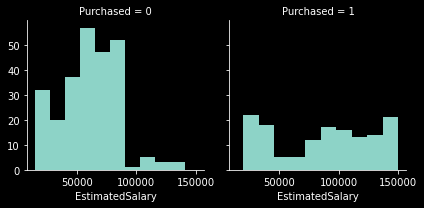

In [47]:
g=sns.FacetGrid(clear_data,col='Purchased')
g.map(plt.hist,'EstimatedSalary')

## Preparing The Data For Modelling

In [48]:
y= clear_data.iloc[:,[3]] # Dependent Data
X= clear_data.iloc[:,0:3] #Independent Data

In [49]:
X1=pd.get_dummies(X, columns =["Gender"])# Creating dummies for the column 'Gender'

<AxesSubplot:xlabel='Purchased', ylabel='count'>

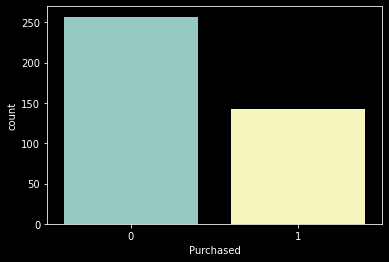

In [50]:
sns.countplot(clear_data['Purchased'])# Histogram For The Dependent Variable

# Building The Model

In [51]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=0)# Splitting the dataset into trainig set and test set
print(X_train.shape) # Checking the shape for train set
print(X_test.shape) # Checking the shape for test set


(300, 4)
(100, 4)


In [52]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm)# Printing the confusion matrix
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('Accuracy : ', accuracy)# Calcuating the  accuracy of the model
sensitivity=cm[1,1]/(cm[1,1]+cm[1,0])# Calculating the ssensitivity of the model
print('Sensitivity : ',sensitivity)
specificity=cm[0,0]/(cm[0,0]+cm[0,1])# Calculating the specificity of the model
print('Specificity : ',specificity)

Confusion Matrix: 
 [[68  0]
 [32  0]]
Accuracy :  0.68
Sensitivity :  0.0
Specificity :  1.0


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))# Getting the classification report

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



In [55]:
!pip install imblearn

In [56]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)
columns = X_train.columns
#On Train Data
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Purchased'])

#On Test Data
os_data_test_X,os_data_test_y=os.fit_resample(X_test, y_test)
os_data_test_X = pd.DataFrame(data=os_data_test_X,columns=columns )
os_data_test_y= pd.DataFrame(data=os_data_test_y,columns=['Purchased'])




In [59]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm1)# Printing the confusion matrix
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print('Accuracy : ', accuracy1)# Calcuating the  accuracy of the model
sensitivity1=cm1[1,1]/(cm1[1,1]+cm1[1,0])# Calculating the ssensitivity of the model
print('Sensitivity : ',sensitivity1)
specificity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])# Calculating the specificity of the model
print('Specificity : ',specificity1)

Confusion Matrix: 
 [[79  0]
 [41  0]]
Accuracy :  0.6583333333333333
Sensitivity :  0.0
Specificity :  1.0


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))# Getting the classification report

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



Text(0, 0.5, 'true positive rate')

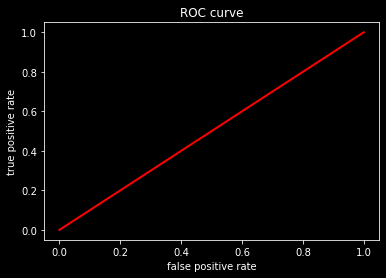

In [60]:
#plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(y_test,y_pred,drop_intermediate=False)
##Title and label
plt.plot(fpr, tpr, color='red',lw=2)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [61]:
#calculating auc score
roc_auc_score(y_test,y_pred)

0.5